In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Datasets/LTC.csv")

In [3]:
df.head()

,Crypto,Date,Open,High,Low,Close
0,LTC,12/31/22,67.78,71.04,67.56,70.29
1,LTC,12/30/22,66.08,68.57,66.04,67.78
2,LTC,12/29/22,66.39,67.16,65.58,66.08
3,LTC,12/28/22,68.08,69.37,66.09,66.42
4,LTC,12/27/22,69.92,71.03,67.80,68.08


In [4]:
print("Dataframe Shape: " , df.shape)
print("Dataframe feature Datatypes: ", df.dtypes)
print("Dataframe Description: ", df.describe())

Dataframe Shape:  (1975, 6)
Dataframe feature Datatypes:  Crypto     object
Date       object
Open      float64
High      float64
Low       float64
Close     float64
dtype: object
Dataframe Description:                Open         High          Low        Close
count  1975.000000  1975.000000  1975.000000  1975.000000
mean     98.426248   102.451261    94.191747    98.345600
std      58.750386    62.229616    55.228690    58.674749
min      22.660000    23.470000    22.260000    22.580000
25%      54.745000    56.390000    52.745000    54.765000
50%      78.410000    81.680000    75.600000    78.190000
75%     132.380000   137.100000   125.935000   132.130000
max     373.350000   413.220000   345.760000   373.640000


In [5]:
df.isnull().sum()

Crypto    0
Date      0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.sort_values('Date')

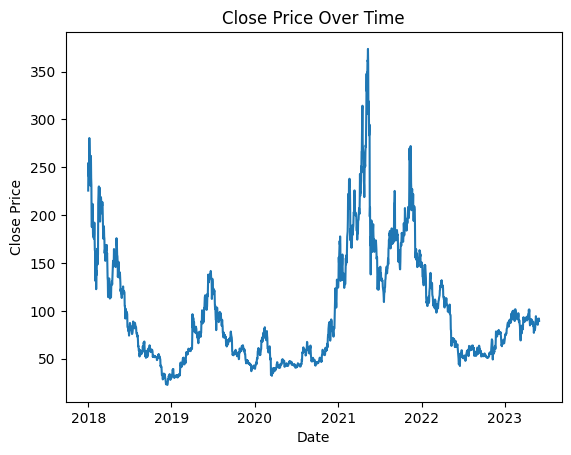

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


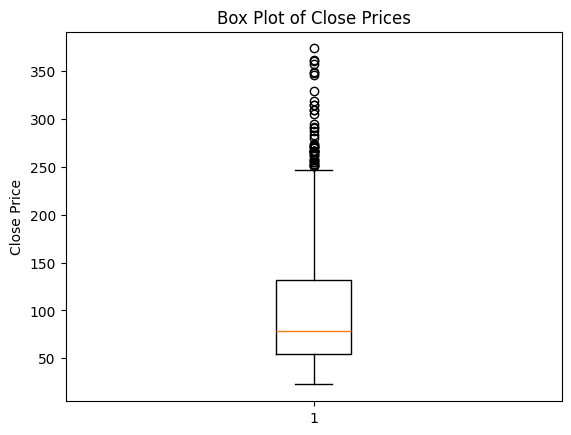

In [8]:
plt.figure()
plt.boxplot(df['Close'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.show()

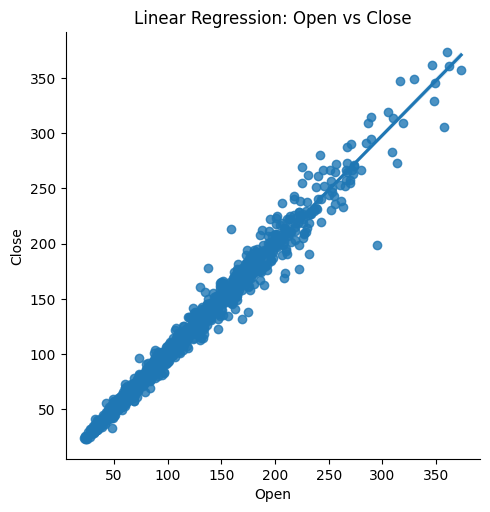

In [9]:
import seaborn as sns

sns.lmplot(x='Open', y='Close', data=df)
plt.title('Linear Regression: Open vs Close')
plt.show()

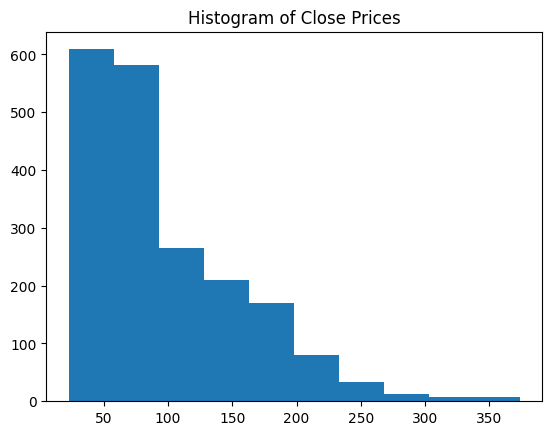

In [10]:
plt.figure()
plt.hist(df['Close'])
plt.title('Histogram of Close Prices')
plt.show()

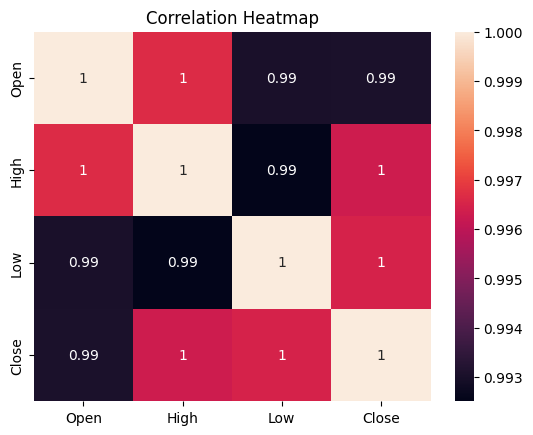

In [11]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df = df.sort_values('Date').reset_index(drop=True)

In [13]:
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))


In [14]:
df['MA_7']  = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

In [15]:
df['Volatility_7']  = df['Daily_Return'].rolling(window=7).std()
df['Volatility_14'] = df['Daily_Return'].rolling(window=14).std()

In [16]:
window = 14
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [17]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = exp12 - exp26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [18]:
df = df.dropna().reset_index(drop=True)

In [19]:
print(df.columns)
df.head()

Index(['Crypto', 'Date', 'Open', 'High', 'Low', 'Close', 'Daily_Return',
       'Log_Return', 'MA_7', 'MA_14', 'MA_30', 'Volatility_7', 'Volatility_14',
       'RSI', 'MACD', 'MACD_Signal'],
      dtype='object')


,Crypto,Date,Open,High,Low,Close,Daily_Return,Log_Return,MA_7,MA_14,MA_30,Volatility_7,Volatility_14,RSI,MACD,MACD_Signal
0,LTC,2018-01-31,163.63,166.00,155.00,162.30,-0.008128,-0.008161,176.141429,182.933571,213.560000,0.052730,0.055051,39.003316,-15.850626,-13.686004
1,LTC,2018-02-01,162.33,164.87,127.00,140.84,-0.132224,-0.141822,170.682857,179.231429,210.733667,0.068898,0.062925,30.197906,-17.974471,-14.543697
2,LTC,2018-02-02,140.66,147.00,101.00,131.08,-0.069298,-0.071817,164.352857,174.707857,206.616333,0.070045,0.063600,27.201382,-20.212190,-15.677396
3,LTC,2018-02-03,130.61,165.40,117.97,160.70,0.225969,0.203731,161.567143,171.061429,203.873000,0.122089,0.088328,33.115036,-19.372202,-16.416357
4,LTC,2018-02-04,160.88,174.40,135.88,147.07,-0.084816,-0.088631,155.125714,167.928571,200.775333,0.119631,0.087430,34.768718,-19.580619,-17.049209


In [20]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [
    'Open','High','Low','Close',
    'Daily_Return','Log_Return',
    'MA_7','MA_14','MA_30',
    'Volatility_7','Volatility_14',
    'RSI','MACD','MACD_Signal'
]

In [21]:
scaler = MinMaxScaler(feature_range=(1, 10))

df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])


In [22]:
print(df_scaled[cols_to_scale].min())
print(df_scaled[cols_to_scale].max())


Open             1.0
High             1.0
Low              1.0
Close            1.0
Daily_Return     1.0
Log_Return       1.0
MA_7             1.0
MA_14            1.0
MA_30            1.0
Volatility_7     1.0
Volatility_14    1.0
RSI              1.0
MACD             1.0
MACD_Signal      1.0
dtype: float64
Open             10.0
High             10.0
Low              10.0
Close            10.0
Daily_Return     10.0
Log_Return       10.0
MA_7             10.0
MA_14            10.0
MA_30            10.0
Volatility_7     10.0
Volatility_14    10.0
RSI              10.0
MACD             10.0
MACD_Signal      10.0
dtype: float64


In [23]:
df_scaled['Target'] = df_scaled['Close'].shift(-1)
df_scaled = df_scaled.dropna()

In [24]:
split = int(len(df_scaled) * 0.8)
train = df_scaled.iloc[:split]
test  = df_scaled.iloc[split:]

In [25]:
X_train = train.drop(['Target','Crypto','Date'], axis=1)
y_train = train['Target']
X_test  = test.drop(['Target','Crypto','Date'], axis=1)
y_test  = test['Target']

In [26]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)